In [13]:
import pandas as pd
import numpy as np

In [14]:
d = {
    'Taste': ['Meh', 'Meh', 'Meh', 'Yummy', 'Yummy', 'Meh', 'Yummy', 'Yummy', 'Yummy', 'Meh'],
    'Farm climate': ["Warm", "Cold", "Cold", "Cold", "Warm", "Warm", "Warm", "Cold", "Cold", "Warm"],
    'Visual defects': ["Some", "None", "None", "Many", "Many", "Some", "Many", "None", "None", "Some"],
    'Size': ['Small', 'Large', 'Large', 'Small', 'Small', 'Large', 'Large', 'Small', 'Small', 'Large']
}
df = pd.DataFrame(data=d)
df

,Taste,Farm climate,Visual defects,Size
0,Meh,Warm,Some,Small
1,Meh,Cold,None,Large
2,Meh,Cold,None,Large
3,Yummy,Cold,Many,Small
4,Yummy,Warm,Many,Small
5,Meh,Warm,Some,Large
6,Yummy,Warm,Many,Large
7,Yummy,Cold,None,Small
8,Yummy,Cold,None,Small
9,Meh,Warm,Some,Large




---

**Question 1**

---



In [15]:
H_taste = -(5/10) * np.log2(5/10) - (5/10) * np.log2(5/10)
print(f"The initial entropy of taste is {H_taste}")

The initial entropy of taste is 1.0



---
**Question 2**

---

We have that the Visual defects variable has the following:

*   3 "Some" where all were of class "Meh"
*   4 "None" where 2 were of class "Meh" and 2 were of class "Yummy"
*   3 "Many" where all were of class "Yummy"




In [16]:
H_visual_defects = 1.0 - (-(3/10)*(np.log2(1)) - (4/10)*((2/4)*np.log2(2/4) + (2/4)*np.log2(2/4)) - (3/10)*(np.log2(1)))
print(f"The information gain for Visual defects is {H_visual_defects}")

The information gain for Visual defects is 0.6




---

**Question 3**

---



We have that the entropy of Taste given Visual defects is "Some" is:

In [17]:
H_taste_given_some = -(3/3)*(np.log2(3/3))
print(f"The entropy of Taste given Visual defects is 'Some' is {H_taste_given_some}")

The entropy of Taste given Visual defects is 'Some' is -0.0


And the entropy of Taste given Visual defects is "None" is:

In [18]:
H_taste_given_none = -((2/4)*np.log2(2/4) + (2/4)*np.log2(2/4))
print(f"The entropy of Taste given Visual defects is 'None' is {H_taste_given_none}")

The entropy of Taste given Visual defects is 'None' is 1.0




---

**Question 4**

---



In [19]:
import matplotlib.pyplot as plt
import cv2 

class ImageCompressor():
  def __init__(self, path, image_name, k) -> None:
      self.path = path
      self.image_path = self.path + image_name
      self.image = self.load_image()
      self.m, self.n = self.image.shape

      self.k = k

      print("\nThis is the original image\n")
      plt.imshow(self.image.reshape(128, 128, 3))
      plt.show()

  def load_image(self):
    image = cv2.imread(self.image_path)
    image = image/255
    return image.reshape(128 * 128, 3)

  def init_kmeans(self):
    centroids = np.zeros((self.k, self.n))
    
    for i in range(self.k):
        centroids[i] = self.image[np.random.randint(0, self.m + 1), :]
    return centroids

  def get_closest_centroids(self, centroids):
      pt = centroids.shape[0]
      
      index = np.zeros((self.m, 1))
      temp_array = np.zeros((pt, 1))
      
      for i in range(self.m):
          for j in range(pt):
              temp_array[j] = np.sqrt(np.sum((self.image[i, :] - centroids[j, :]) **2))
          index[i] = np.argmin(temp_array) + 1

      return index

  def compute_centroids(self, index):
      centroids = np.zeros((self.k, self.n))
      count = np.zeros((self.k, 1))

      for i in range(self.m):
          id = int((index[i] - 1)[0])
          centroids[id, :] += self.image[i, :]
          count[id] += 1

      return centroids / count

  def do_kmeans(self, steps):
      index = self.get_closest_centroids(self.init_kmeans())
      
      for i in range(steps):
          centroids = self.compute_centroids(index)
          index = self.get_closest_centroids(centroids)

      return centroids, index

  def compress_image(self):
      centroids, index = self.do_kmeans(10)

      compressed_image = self.image.copy()
      for i in range(1, k + 1):
          compressed_image[(index == i).ravel(), :] = centroids[i-1]
          
      compressed_image = compressed_image.reshape(128, 128, 3)

      print("\n\nThis is the compressed image\n")
      plt.imshow(compressed_image)
      plt.show()


Please enter the number the number of clusters: 10

This is the original image



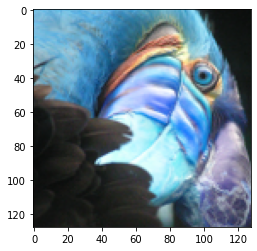



This is the compressed image



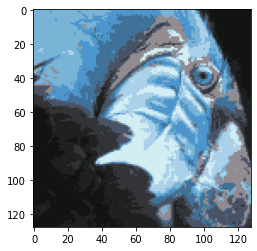

In [20]:
path = "/content/drive/MyDrive/"

k = int(input('Please enter the number the number of clusters: '))

img_comp = ImageCompressor(path, "Assignment5.png", k=k)
img_comp.compress_image()